In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
values = {
    'initial' : np.array([0.333, 0.562, 0.463]),
    'rebound' : np.array([0.154, 0.251, 0.196])
    }

final_values = {
    'initial': np.sqrt(values['initial']),
    'rebound': np.sqrt(values['rebound'])
    }

x = final_values['initial']
y = final_values['rebound']

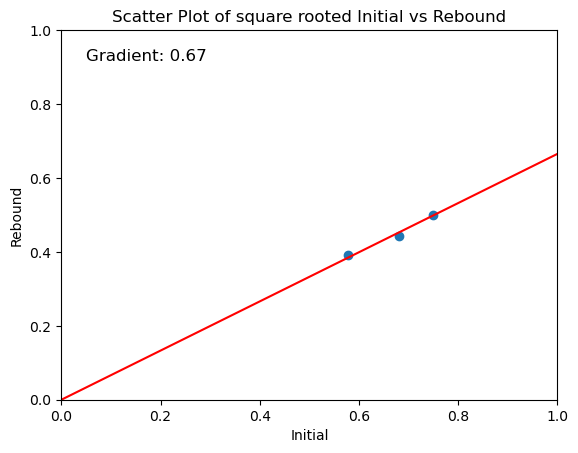

<Figure size 32000x24000 with 0 Axes>

In [ ]:
plt.scatter(x, y)

plt.xlabel('Initial')
plt.ylabel('Rebound')
plt.title('Scatter Plot of square rooted Initial vs Rebound')

# Calculate the slope of the trendline passing through the origin
slope = np.sum(x * y) / np.sum(x * x)

# Generate trendline values
trendline_x = np.linspace(0, 1, 100)
trendline_y = slope * trendline_x

# Plot the trendline
plt.plot(trendline_x, trendline_y, color='red')
plt.text(0.05, 0.95, f'Gradient: {round(slope, 2)}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Set the scale of both axes to be from 0 to 1
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.figure(dpi=300)
plt.show()